# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

<hr>

## Instalación de algunas bibliotecas de Python

In [ ]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade

In [1]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import collections

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate
from IPython.display import display # display from IPython.display

import itertools

In [2]:
import itertools
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred, class_names,title="Confusion matrix",normalize=False,onehot = False, size=4):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    if onehot :
        cm = confusion_matrix([y_i.argmax() for y_i in y_true], [y_ip.argmax() for y_ip in y_pred])
    else:
        cm = confusion_matrix(y_true, y_pred)
    figure = plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2) if normalize else cm

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #return figure

<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [91]:
!sudo rm to_be_scored_digitalhouse.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

--2020-09-16 17:57:50--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67308 (66K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv’

to_be_scored_digita 100%[===================>]  65.73K  --.-KB/s    in 0.002s  

2020-09-16 17:57:50 (35.3 MB/s) - ‘to_be_scored_digitalhouse.csv’ saved [67308/67308]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
995,995,33.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.6,4576.5,15.1,NaN
996,996,40.0,MASCULINO,ARGENTINA,TERTIARY,COMMERCIAL,PROGRAMACION,3.4,4542.9,26.1,NaN
997,997,NaN,FEMENINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,3.4,NaN,27.4,NaN
998,998,NaN,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,DATA,3.7,4730.4,1.1,NaN
999,999,36.0,NaN,ARGENTINA,UNIVERSITARY,NaN,PROGRAMACION,3.3,4506.5,20.4,NaN


In [92]:
!sudo rm train_dataset_digitalhouse.csv
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.head()

--2020-09-16 17:58:26--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv’

train_dataset_digit 100%[===================>] 639.19K  --.-KB/s    in 0.02s   

2020-09-16 17:58:26 (29.9 MB/s) - ‘train_dataset_digitalhouse.csv’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,1000,37.0,FEMENINO,BRAZIL,UNIVERSITARY,NaN,PROGRAMACION,3.1,4131.5,21.3,97.0
1,1001,40.0,FEMENINO,NaN,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.1,4160.4,25.2,102.0
2,1002,35.0,NaN,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.1,4087.6,18.0,89.0
3,1003,33.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,NaN,3.1,4043.2,13.6,96.0
4,1004,29.0,NaN,BRAZIL,UNIVERSITARY,DEVELOPMENT,NaN,3.6,4688.0,NaN,83.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [93]:
print("Cantidad de datos: {}".format(len(df_training_dataset)))
df_training_dataset.isnull().sum()#.info()

Cantidad de datos: 8995


Unnamed: 0         0
EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64

In [94]:
df_training_dataset.nunique()

Unnamed: 0      8995
EDAD              37
GENERO             2
RESIDENCIA         3
NV_ESTUDIO         3
ESTUDIO_PREV       5
TRACK_DH           4
AVG_DH            29
MINUTES_DH      5109
EXPERIENCIA      318
DIAS_EMP          34
dtype: int64

<hr>

Text(0.5, 1.0, 'Días EMP')

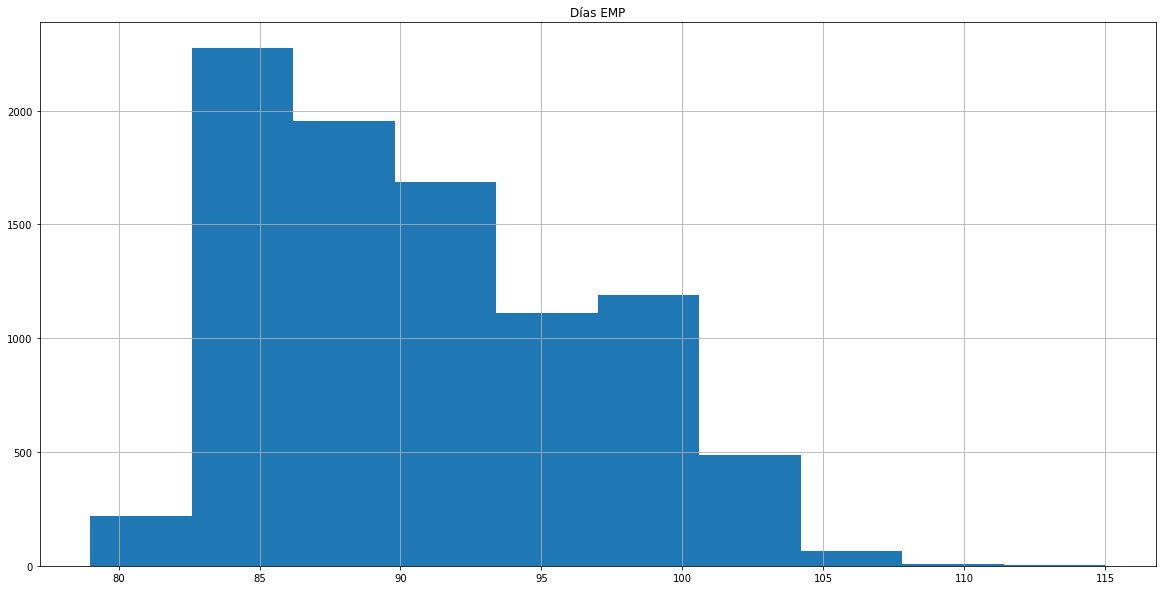

In [95]:
df_training_dataset['DIAS_EMP'].hist().set_title('Días EMP')

In [96]:
df_training_dataset.columns.tolist()

['Unnamed: 0',
 'EDAD',
 'GENERO',
 'RESIDENCIA',
 'NV_ESTUDIO',
 'ESTUDIO_PREV',
 'TRACK_DH',
 'AVG_DH',
 'MINUTES_DH',
 'EXPERIENCIA',
 'DIAS_EMP']

# EDA
* Visualizar el comportamiento de las caracteristicas, distribución
* Corr matrix en relación con la variable a objetivo

### Historical and Bar distribución
Se observan muy buenas distribuciones normales, al parecer no hay nada que modificar en su comportamiento

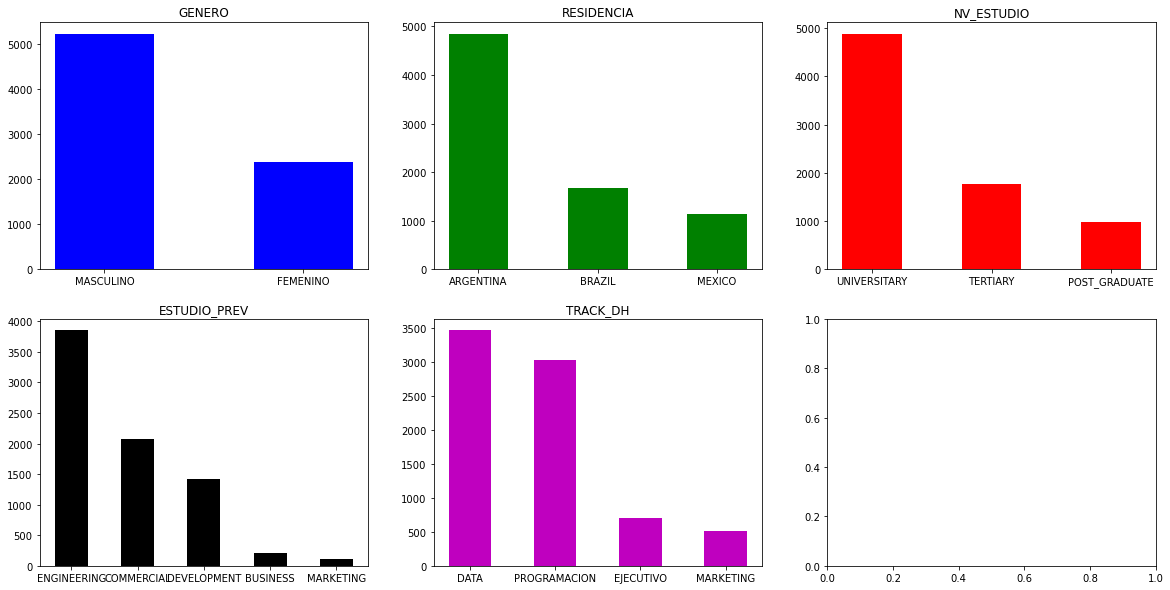

In [97]:
from pylab import rcParams
columns_cat = ['GENERO','RESIDENCIA' ,'NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=2, ncols=3)
colors = ['b', 'g', 'r', 'k','m','b','g', 'r', 'k','m','b']
for n, zippack in enumerate(zip(axes.flatten(), columns_cat)):
    axhist , i_label = zippack
    axhist.bar(df_training_dataset[i_label].value_counts().index.astype('object'), df_training_dataset[i_label].value_counts(),color=colors[n],width=0.5)
    axhist.set_title(i_label)

* Observando las diferencias entre generos, en su representación dentro de cada categoría

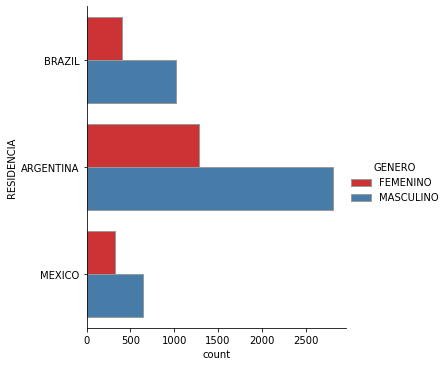

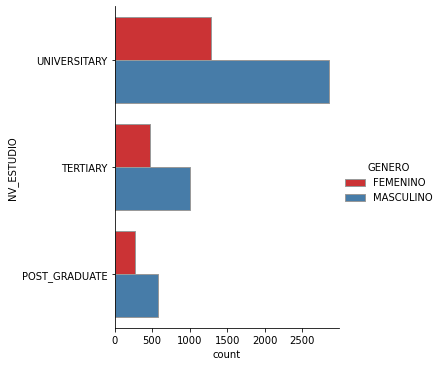

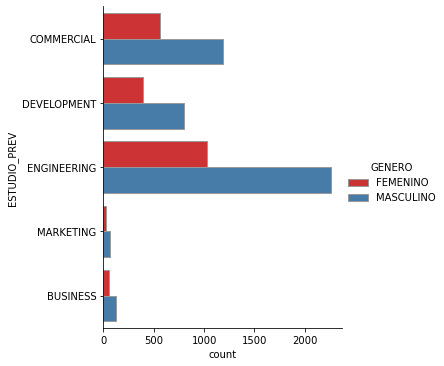

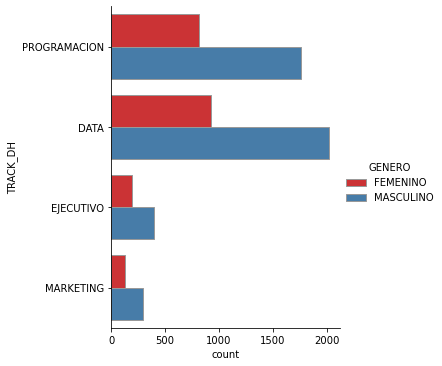

In [101]:
columns = columns_cat.copy()
columns.remove('GENERO')
for column in columns:
    sns.catplot(y=column, hue="GENERO", kind="count",
                palette="Set1", edgecolor=".6",
                data=df_training_dataset, )

### Histogram de las caracteristicas numéricas

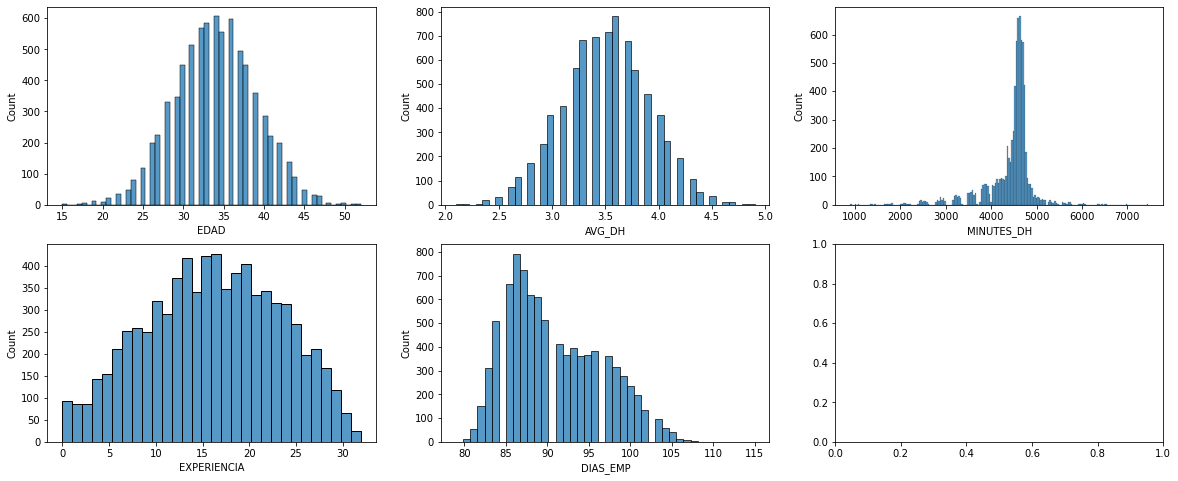

In [102]:
columns_num = ['EDAD','AVG_DH' ,'MINUTES_DH','EXPERIENCIA','DIAS_EMP']
fig, axes = plt.subplots(nrows=round(len(columns_num)/3), ncols=3, figsize=(20, 8))
for ax, column in zip(axes.flatten(),columns_num):
    sns.histplot(df_training_dataset[column], ax=ax )

## Corr Matrix
* Obervamos una fuerte correlación entre la caracteristica **EXPERIENCIA** y **EDAD**
* Las Categorías de la columna  **GENERO**, agrupa los datos veneficiando la correlación, en **EDAD** y **EXPERIENCIA** para con **DIAS_EMP**
* Las Categorías de la columna **TRACK_DH** muestran tener resultados similares en los resultados de **DIAS_EMP** <br>
FALTA DE CORRELACIÓN:
* Las columnas **AVG_DH** y **MINUTES_SH** no muestran una clara correlación
    * Podemos Generar nuevas columnas a partir de estas para mejorar la correlación


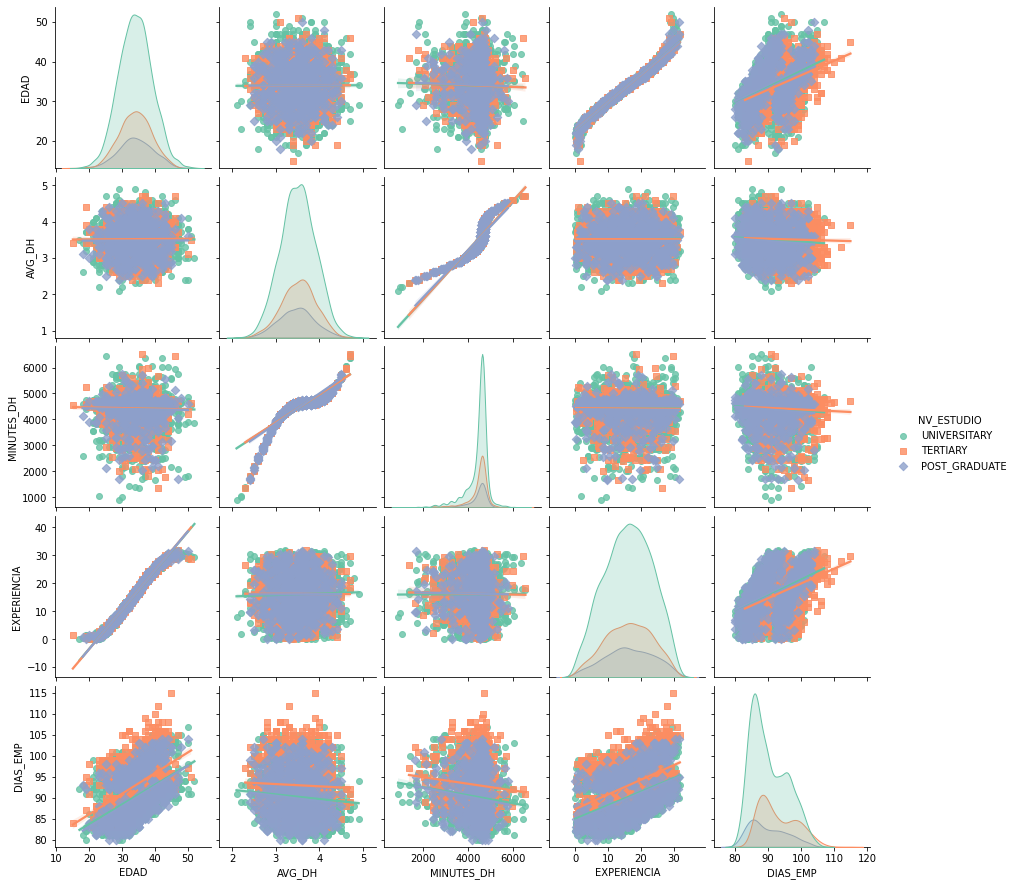

In [103]:
# sns.pairplot(df_training_dataset[columns_num], kind="reg")
# plt.show()
sns.pairplot(df_training_dataset.drop(columns=['Unnamed: 0']), kind="reg", hue="NV_ESTUDIO", markers=["o", "s", "D"], palette="Set2") # TRACK_DH
plt.show()

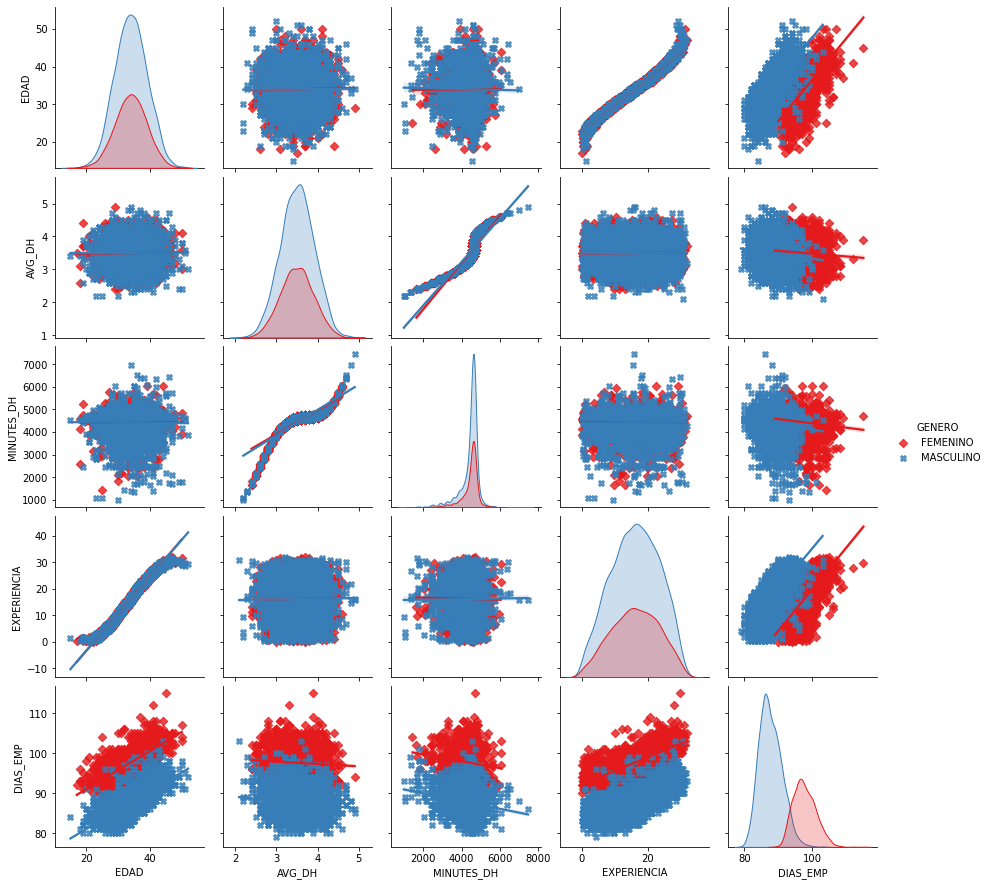

In [104]:
# sns.pairplot(df_training_dataset[columns_num], kind="reg")
# plt.show()
sns.pairplot(df_training_dataset.drop(columns=['Unnamed: 0']), kind="reg", hue="GENERO", markers=["D",'X'], palette="Set1") # TRACK_DH
plt.show()

# Feature Engineering
### PATH
1. Eliminar filas con demasiados nan values
2. Eliminar columnas innecesarias
3. Rellenar categorical missing values 
4. Rellenar Numerical missing values
5. Feature Augmentation (principales correlaciones **EDAD**, **GENERO**, **EXPERIENCIA**)
    * categorical feature => EDAD {joven, adulto, adulto2, mayor, mayor2, old}
    * categorical feature => EXPERIENCIA {'novel', 'entry', 'exp', 'exp2','mayor','senior'}
    * numerical feature   => EXPERIENCIA * AVG_DH
    * numerical feature   => EXPERIENCIA / MINUTES_DH
    * numerical feature   => EXPERIENCIA / EDAD
    * numerical feature   => EDAD * AVG_DH
    * numerical feature   => AVG_DH / MINUTES_DH
    
    

## Eliminando filas nulas y columnas innecesarias
Para asegurar los datos mas precisos posibles, se eliminaron las filas que tuvieran al menos 1 nulo en las siguientes columnas 'GENERO', 'EXPERIENCIA','EDAD','MINUTES_DH' ya que según los estimadores, son las caracteristicas principales que podemos hacer más precisas.
* Pasamos de tener en total 8995 muestras a 7994, eliminando así alrededor de 1000 datos

In [162]:
def droprowsNnull( data, n_null=2):
    minNan2drop = n_null
    df_drop = data.dropna(subset=['GENERO', 'EXPERIENCIA','EDAD','MINUTES_DH','ESTUDIO_PREV' ],thresh=4)#thresh=len(data.columns)-(minNan2drop-1))
    return df_drop
######################################################################
df_drop = droprowsNnull(data = df_training_dataset, n_null=3)
df_drop = df_drop.drop(columns=['Unnamed: 0'])
df_drop.head()
print('Cantidad de datos: {}'.format(len(df_drop)))
display(df_drop.isnull().sum()) #8995.info() 8452 7994 7509
#display(df_drop['DIAS_EMP'].value_counts())

Cantidad de datos: 7509


EDAD             693
GENERO           721
RESIDENCIA      1124
NV_ESTUDIO      1140
ESTUDIO_PREV     687
TRACK_DH        1042
AVG_DH          1125
MINUTES_DH       719
EXPERIENCIA      725
DIAS_EMP           0
dtype: int64

### Generando tabla sin nulos

In [163]:
df_temp_aux = df_training_dataset.dropna(thresh=len(df_training_dataset.columns))# elimina cualquier fila que tenga un valor nulo
df_temp_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 12 to 8994
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2125 non-null   int64  
 1   EDAD          2125 non-null   float64
 2   GENERO        2125 non-null   object 
 3   RESIDENCIA    2125 non-null   object 
 4   NV_ESTUDIO    2125 non-null   object 
 5   ESTUDIO_PREV  2125 non-null   object 
 6   TRACK_DH      2125 non-null   object 
 7   AVG_DH        2125 non-null   float64
 8   MINUTES_DH    2125 non-null   float64
 9   EXPERIENCIA   2125 non-null   float64
 10  DIAS_EMP      2125 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 199.2+ KB


## Creando Metodo para llenar todos los nulos de las caracteristica categóricas
* Agrupar segun [Genero, Residencia, NV_studio, estudio_prev, track_dj]

In [164]:
from tqdm import tqdm
def fill_values(data, aux_table, columns2fill, columnsBase, target_column=None):
    """ columns2fill no contiene la etiqueta targe """
    columnsBase.append(target_column) if target_column else None
    
    def fill_na_val(x,mode_values, base_table,base_table_ex,column,target_column,columnBase_i,columnBase_i_group,columnBase_i_group_ex):
        if x[column] == x[column]: ## solo deben entrar los valores nulos
            return x[column] 
        valores2look = [x[col_name] if x[col_name] == x[col_name] else mode_values[col_name][0]  for col_name in columnBase_i_group]
        valores2look = tuple(valores2look)
        try:
            valuefix = base_table.loc[valores2look][0]
            
        except:
            #print(valores2look)
            #print(valores2look)
            #base_table   = aux_table[columnBase_i].groupby(columnBase_i_group).agg(lambda x:x.value_counts().index[0])
            valores2look = tuple([x[col_name] for col_name in columnBase_i_group_ex])
            valuefix = base_table_ex.loc[valores2look][0]
            #print('Se Alternó')
            pass
        return valuefix
    
    for column in tqdm(columns2fill):
        #print(columnsBase)
        columnBase_i       = columnsBase.copy()
        columnBase_i_group = columnsBase.copy()
        if not column in columnsBase:
            columnBase_i.append(column)
        else: 
            columnBase_i_group.remove(column)
        base_table   = aux_table[columnBase_i].groupby(columnBase_i_group).agg(lambda x:x.value_counts().index[0])
        
        columnBase_i_ex = columnBase_i.copy()
        columnBase_i_ex.remove(target_column) if target_column else None
        columnBase_i_group_ex = columnBase_i_group.copy()
        columnBase_i_group_ex.remove(target_column) if target_column else None
        mode_values = aux_table[columns2fill].mode()
        base_table_ex   = aux_table[columnBase_i_ex].groupby(columnBase_i_group_ex).agg(lambda x:x.value_counts().index[0])
        
        data[column] = data.apply(fill_na_val,args=(mode_values, base_table,base_table_ex,column,target_column,columnBase_i,columnBase_i_group,columnBase_i_group_ex ), axis=1)
    return data.copy()

### TRAIN DATA: Imputando datos categóricos

In [165]:
columns2fill_ = ['GENERO','RESIDENCIA','NV_ESTUDIO', 'ESTUDIO_PREV','TRACK_DH']
columnsBase__ = ['GENERO','NV_ESTUDIO','TRACK_DH']
df_train_fill_cat = fill_values(data = df_drop.copy(),aux_table=df_temp_aux.copy() , columns2fill = columns2fill_, columnsBase = columnsBase__  )
df_train_fill_cat = df_train_fill_cat.reset_index(drop=True)
df_train_fill_cat.info()

100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EDAD          6816 non-null   float64
 1   GENERO        7509 non-null   object 
 2   RESIDENCIA    7509 non-null   object 
 3   NV_ESTUDIO    7509 non-null   object 
 4   ESTUDIO_PREV  7509 non-null   object 
 5   TRACK_DH      7509 non-null   object 
 6   AVG_DH        6384 non-null   float64
 7   MINUTES_DH    6790 non-null   float64
 8   EXPERIENCIA   6784 non-null   float64
 9   DIAS_EMP      7509 non-null   float64
dtypes: float64(5), object(5)
memory usage: 586.8+ KB


### TEST DATA: Imputando datos categóricos

In [166]:
df_to_be_scored.isnull().sum()

Unnamed: 0         0
EDAD             139
GENERO           132
RESIDENCIA       169
NV_ESTUDIO       142
ESTUDIO_PREV     140
TRACK_DH         153
AVG_DH           160
MINUTES_DH       164
EXPERIENCIA      145
Unnamed: 10     1000
dtype: int64

In [167]:
columns2fill_ = ['GENERO','RESIDENCIA','NV_ESTUDIO', 'ESTUDIO_PREV','TRACK_DH']
columnsBase__ = ['GENERO','NV_ESTUDIO','TRACK_DH']
df_test_fill_cat = fill_values(data = df_to_be_scored.copy(),aux_table=df_temp_aux.copy() , columns2fill = columns2fill_, columnsBase = columnsBase__  )
df_test_fill_cat = df_test_fill_cat.reset_index(drop=True)
df_test_fill_cat.info()

100%|██████████| 5/5 [00:00<00:00, 12.06it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   EDAD          861 non-null    float64
 2   GENERO        1000 non-null   object 
 3   RESIDENCIA    1000 non-null   object 
 4   NV_ESTUDIO    1000 non-null   object 
 5   ESTUDIO_PREV  1000 non-null   object 
 6   TRACK_DH      1000 non-null   object 
 7   AVG_DH        840 non-null    float64
 8   MINUTES_DH    836 non-null    float64
 9   EXPERIENCIA   855 non-null    float64
 10  Unnamed: 10   0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


## Imputando Caracteristicas numéricas
* En la gráfica de correlación podemos ver que existen relaciones fuertes entre caractetisticas
    * EXPERIENCIA VS EDAD  directa/inversa
    * MINUTES_DH VS AVG_DH directa/inversa
* Generaremos 4 modelos de regresión lineal que nos ayuden a imputar los valores faltantes

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import RandomForestRegressor

def data_imputer_regresor(data, aux_data, relation):
    def predict_value(x,know,miss,regressor):
        if x[miss] != x[miss]:
            if x[know] != x[know] :
                return x[miss]
            return reg.predict(np.stack([x[know]]).reshape(-1, 1)  )[0]  #np.array([[x[know]]])
        else:
            return x[miss]
    
    data = data.copy()
    reg = RandomForestRegressor(max_depth=8, random_state=0)
    for miss, know in tqdm(relation):
        reg.fit(aux_data[[know]], aux_data[[miss]].values.ravel())
        data[miss] = data.apply(predict_value, args=(know,miss,reg), axis=1)
    return data

### TRAIN DATA: imputando valores
Logramos imputar lasprincipales caracteristicas numéricas, sin embargo aún quedan algunos valores por completar, continuamos
* Notamos que resultan con 176 valores nulos en AVG_DH y MINUTES_DH
* Al ser una cantidad tan inferior, podemos obtar por eliminarla así no introducimos más ruido a nuestro modelo, **sin embargo** aún necesitamos referencias para el imputador de valores en la data de TEST

In [169]:
relation = [('EXPERIENCIA','EDAD') ,('EDAD','EXPERIENCIA'),('MINUTES_DH','AVG_DH'),('AVG_DH','MINUTES_DH') ]
df_train_fill_cat = data_imputer_regresor(data= df_train_fill_cat , aux_data =df_temp_aux.copy()  , relation=relation)
df_train_fill_cat.isnull().sum()

100%|██████████| 4/4 [00:23<00:00,  5.78s/it]


EDAD              0
GENERO            0
RESIDENCIA        0
NV_ESTUDIO        0
ESTUDIO_PREV      0
TRACK_DH          0
AVG_DH          101
MINUTES_DH      101
EXPERIENCIA       0
DIAS_EMP          0
dtype: int64

### TEST DATA: imputando valores

In [170]:
relation = [('EXPERIENCIA','EDAD') ,('EDAD','EXPERIENCIA'),('MINUTES_DH','AVG_DH'),('AVG_DH','MINUTES_DH') ]
df_test_fill_cat = data_imputer_regresor(data= df_test_fill_cat , aux_data =df_temp_aux.copy()  , relation=relation)
df_test_fill_cat.isnull().sum()

100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


Unnamed: 0         0
EDAD              18
GENERO             0
RESIDENCIA         0
NV_ESTUDIO         0
ESTUDIO_PREV       0
TRACK_DH           0
AVG_DH            30
MINUTES_DH        30
EXPERIENCIA       18
Unnamed: 10     1000
dtype: int64

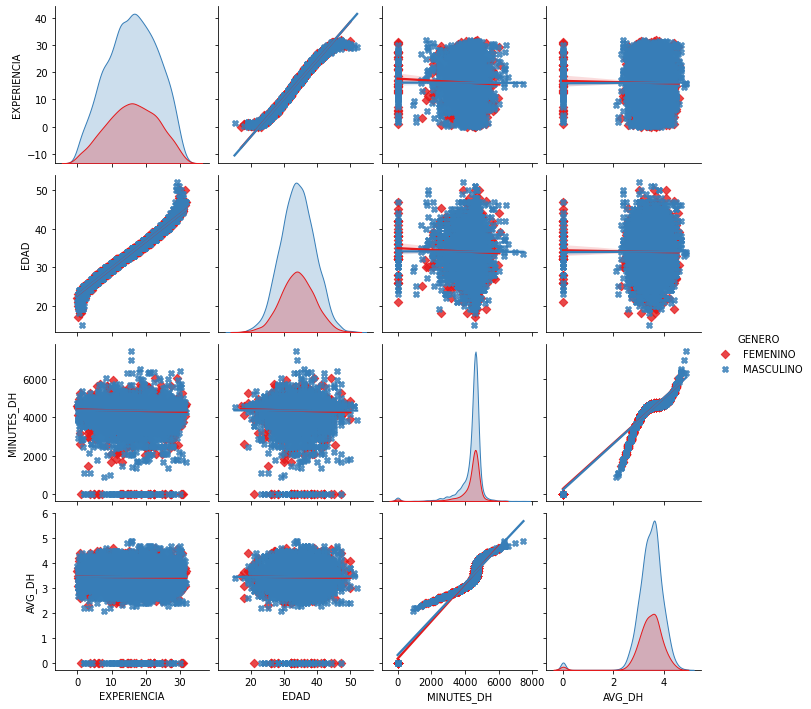

In [171]:
sns.pairplot(df_train_fill_cat[['EXPERIENCIA','EDAD','GENERO','MINUTES_DH','AVG_DH']].fillna(0), kind="reg", hue="GENERO", markers=["D",'X'], palette="Set1") # TRACK_DH
plt.show()

## IMPUTANDO Valores numéricos con KNN

In [172]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import  BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputers = {'itera':IterativeImputer(sample_posterior=False,random_state=15,
                                     imputation_order='ascending',n_nearest_features=None,initial_strategy='most_frequent',max_iter=10),
                'knn': KNNImputer(n_neighbors=10, weights='uniform')}
imp_name = 'knn'
columns_num = ['EDAD','AVG_DH' ,'MINUTES_DH','EXPERIENCIA','DIAS_EMP']
columns = columns_num.copy()
columns.remove('DIAS_EMP')
#columns_num
df_train_filled = df_train_fill_cat.copy()
train_imputer = imputers[imp_name]
train_imputer.fit(df_train_filled[columns])
df_train_filled.loc[:,columns] = train_imputer.transform(df_train_filled[columns])
#df_train[columns_num] = df_healthy_num
#df_train.sort_index(inplace=True)

##################################### Creando KNN_imputer para las muestras de Testeo ####################
test_imputer =  imputers[imp_name]
test_imputer.fit(df_train_filled[columns])
########
display(df_train_filled.head())
display(df_train_filled.info())

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,37.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.100000,4131.5,21.3,97.0
1,40.0,FEMENINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.100000,4160.4,25.2,102.0
2,35.0,MASCULINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.100000,4087.6,18.0,89.0
3,33.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,3.100000,4043.2,13.6,96.0
4,28.0,FEMENINO,ARGENTINA,UNIVERSITARY,MARKETING,DATA,3.273056,4369.3,7.0,101.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EDAD          7509 non-null   float64
 1   GENERO        7509 non-null   object 
 2   RESIDENCIA    7509 non-null   object 
 3   NV_ESTUDIO    7509 non-null   object 
 4   ESTUDIO_PREV  7509 non-null   object 
 5   TRACK_DH      7509 non-null   object 
 6   AVG_DH        7509 non-null   float64
 7   MINUTES_DH    7509 non-null   float64
 8   EXPERIENCIA   7509 non-null   float64
 9   DIAS_EMP      7509 non-null   float64
dtypes: float64(5), object(5)
memory usage: 586.8+ KB


None

## Test Data: Imputando Caracteristicas numéricas

In [173]:
columns = columns_num.copy()
columns.remove('DIAS_EMP')
df_test_filled = df_test_fill_cat.copy()
df_test_filled.loc[:,columns] = test_imputer.transform(df_test_filled[columns])
display(df_test_filled.head())
display(df_test_filled.info())

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
0,0,43.0,MASCULINO,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,3.8,4557.9,27.996177,NaN
1,1,42.0,FEMENINO,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,3.5,4656.2,25.600000,NaN
2,2,35.0,FEMENINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,4.0,4695.2,19.000000,NaN
3,3,35.0,MASCULINO,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,4.1,4778.2,18.400000,NaN
4,4,36.0,MASCULINO,ARGENTINA,POST_GRADUATE,COMMERCIAL,PROGRAMACION,4.0,4722.3,19.100000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   EDAD          1000 non-null   float64
 2   GENERO        1000 non-null   object 
 3   RESIDENCIA    1000 non-null   object 
 4   NV_ESTUDIO    1000 non-null   object 
 5   ESTUDIO_PREV  1000 non-null   object 
 6   TRACK_DH      1000 non-null   object 
 7   AVG_DH        1000 non-null   float64
 8   MINUTES_DH    1000 non-null   float64
 9   EXPERIENCIA   1000 non-null   float64
 10  Unnamed: 10   0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


None

## Visualizando los datos rellenados

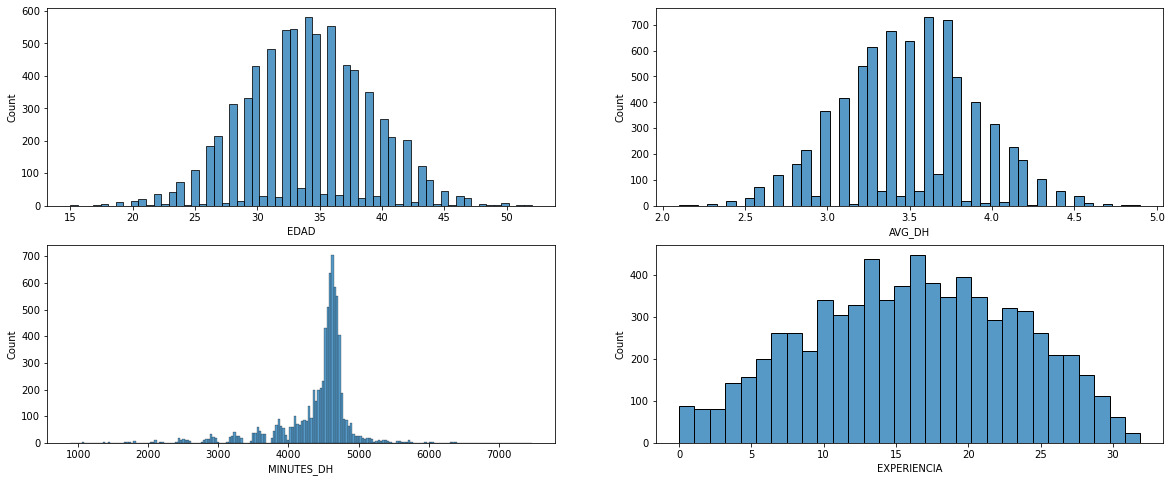

In [174]:
columns_num = ['EDAD','AVG_DH' ,'MINUTES_DH','EXPERIENCIA']
fig, axes = plt.subplots(nrows=round(len(columns_num)/2), ncols=2, figsize=(20, 8))
for ax, column in zip(axes.flatten(),columns_num):
    sns.histplot(df_train_filled[column], ax=ax )

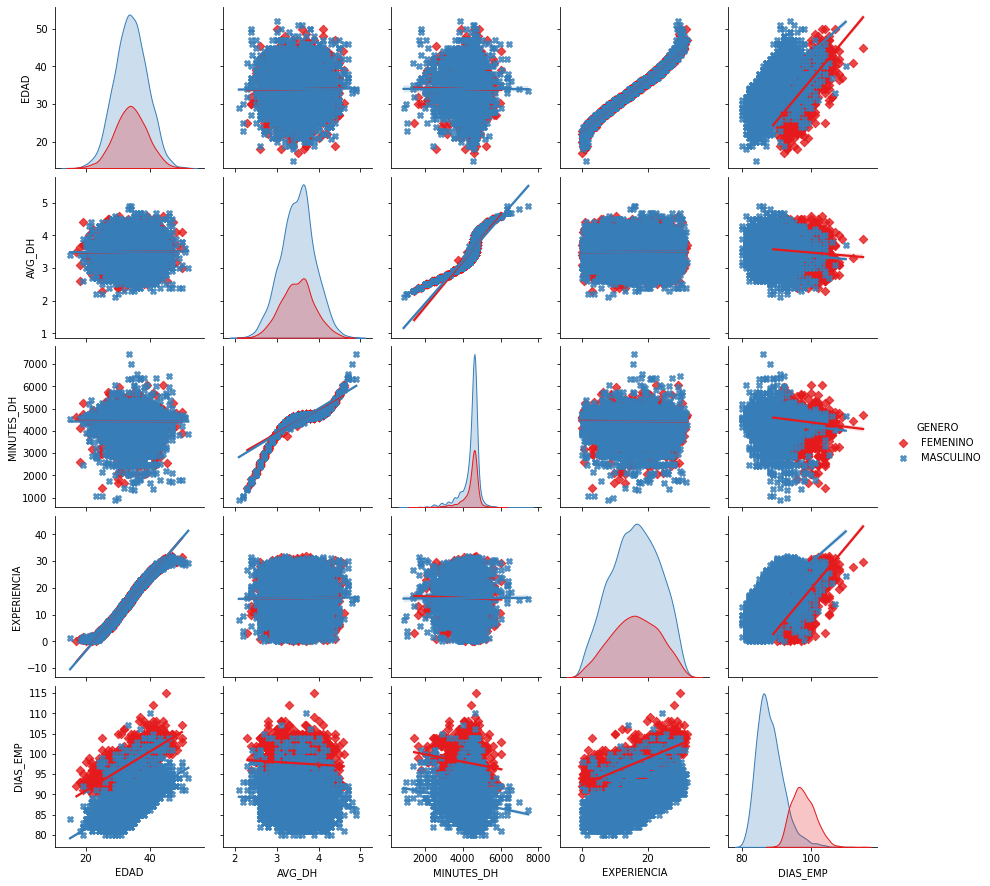

In [175]:
# sns.pairplot(df_training_dataset[columns_num], kind="reg")
# plt.show()
sns.pairplot(df_train_filled, kind="reg", hue="GENERO", markers=["D",'X'], palette="Set1") # TRACK_DH
plt.show()

## Feature Augmentation (principales correlaciones **EDAD**, **GENERO**, **EXPERIENCIA**)
    * categorical feature => EDAD {joven, adulto, adulto2, mayor, mayor2, old}
    * categorical feature => EXPERIENCIA {'novel', 'entry', 'exp', 'exp2','mayor','senior'}
    * numerical feature   => EXPERIENCIA * AVG_DH
    * numerical feature   => EXPERIENCIA / MINUTES_DH
    * numerical feature   => EXPERIENCIA / EDAD
    * numerical feature   => EDAD * AVG_DH
    * numerical feature   => AVG_DH / MINUTES_DH

In [176]:
def add_new_features(data):
    data = data.copy()
    data['cat_edad'] = pd.cut(data['EDAD'], [min(15,data['EDAD'].min()-1),25,30,35,40,45,max(50,data['EDAD'].max())],labels = ['joven', 'adulto', 'adulto2', 'mayor', 'mayor2', 'old'])
    data['cat_exp']  = pd.cut(data['EXPERIENCIA'], [min(0, data['EXPERIENCIA'].min()-1 ),5,10,15,20,25,max(50,data['EXPERIENCIA'].max())],labels = ['novel', 'entry', 'exp', 'exp2','mayor','senior'])
    def improve_feat(x):
        exp_imp   = x['EXPERIENCIA']*x['AVG_DH']     
        r_exp_min = x['EXPERIENCIA']/x['MINUTES_DH'] if x['MINUTES_DH'] != 0 else 0
        r_exp_edad= x['EXPERIENCIA']/x['EDAD']       if x['EDAD'] != 0 else 0
        edad_imp  = x['EDAD']*x['AVG_DH']
        r_avg_min = x['AVG_DH']/x['MINUTES_DH']      if x['MINUTES_DH'] != 0 else 0
   
        
        return pd.Series([ exp_imp,r_exp_min, r_exp_edad, edad_imp, r_avg_min     ],
                         index = [ 'exp_imp','r_exp_min', 'r_exp_edad', 'edad_imp', 'r_avg_min'  ])

    return data.join(data.apply(improve_feat, axis=1))

### Train data - features augmentation

In [177]:
df_train_improve = add_new_features(df_train_filled.copy())
df_train_improve.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,37.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.100000,4131.5,21.3,97.0,mayor,mayor,66.03000,0.005156,0.575676,114.700000,0.000750
1,40.0,FEMENINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.100000,4160.4,25.2,102.0,mayor,senior,78.12000,0.006057,0.630000,124.000000,0.000745
2,35.0,MASCULINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.100000,4087.6,18.0,89.0,adulto2,exp2,55.80000,0.004404,0.514286,108.500000,0.000758
3,33.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,3.100000,4043.2,13.6,96.0,adulto2,exp,42.16000,0.003364,0.412121,102.300000,0.000767
4,28.0,FEMENINO,ARGENTINA,UNIVERSITARY,MARKETING,DATA,3.273056,4369.3,7.0,101.0,adulto,entry,22.91139,0.001602,0.250000,91.645558,0.000749


### Test data - features augmentation

In [178]:
df_test_improve = add_new_features(df_test_filled.copy())
df_test_improve.head()

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,0,43.0,MASCULINO,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,3.8,4557.9,27.996177,NaN,mayor2,senior,106.385474,0.006142,0.651074,163.4,0.000834
1,1,42.0,FEMENINO,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,3.5,4656.2,25.600000,NaN,mayor2,senior,89.600000,0.005498,0.609524,147.0,0.000752
2,2,35.0,FEMENINO,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,4.0,4695.2,19.000000,NaN,adulto2,exp2,76.000000,0.004047,0.542857,140.0,0.000852
3,3,35.0,MASCULINO,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,4.1,4778.2,18.400000,NaN,adulto2,exp2,75.440000,0.003851,0.525714,143.5,0.000858
4,4,36.0,MASCULINO,ARGENTINA,POST_GRADUATE,COMMERCIAL,PROGRAMACION,4.0,4722.3,19.100000,NaN,mayor,exp2,76.400000,0.004045,0.530556,144.0,0.000847


## Reemplanzado Genero, Banca_movil_userfriendly y Estado Civil
Reemplazaremos genero: F =0 y M= 1<br>

In [179]:
def replace2binary(data):
    data= data.copy()
    data['GENERO'] = data['GENERO'].apply(lambda x : 1 if x in 'MASCULINO'else 0)
    return data

## TRAIN DATA : binarizando

In [180]:
df_train_r = replace2binary(df_train_improve)
df_train_r.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,37.0,0,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.100000,4131.5,21.3,97.0,mayor,mayor,66.03000,0.005156,0.575676,114.700000,0.000750
1,40.0,0,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.100000,4160.4,25.2,102.0,mayor,senior,78.12000,0.006057,0.630000,124.000000,0.000745
2,35.0,1,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.100000,4087.6,18.0,89.0,adulto2,exp2,55.80000,0.004404,0.514286,108.500000,0.000758
3,33.0,0,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,3.100000,4043.2,13.6,96.0,adulto2,exp,42.16000,0.003364,0.412121,102.300000,0.000767
4,28.0,0,ARGENTINA,UNIVERSITARY,MARKETING,DATA,3.273056,4369.3,7.0,101.0,adulto,entry,22.91139,0.001602,0.250000,91.645558,0.000749


## TEST DATA : binarizando

In [181]:
df_test_r = replace2binary(df_test_improve)
df_test_r.head()

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,0,43.0,1,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,3.8,4557.9,27.996177,NaN,mayor2,senior,106.385474,0.006142,0.651074,163.4,0.000834
1,1,42.0,0,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,3.5,4656.2,25.600000,NaN,mayor2,senior,89.600000,0.005498,0.609524,147.0,0.000752
2,2,35.0,0,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,4.0,4695.2,19.000000,NaN,adulto2,exp2,76.000000,0.004047,0.542857,140.0,0.000852
3,3,35.0,1,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,4.1,4778.2,18.400000,NaN,adulto2,exp2,75.440000,0.003851,0.525714,143.5,0.000858
4,4,36.0,1,ARGENTINA,POST_GRADUATE,COMMERCIAL,PROGRAMACION,4.0,4722.3,19.100000,NaN,mayor,exp2,76.400000,0.004045,0.530556,144.0,0.000847


## Escalando Datos

In [182]:
n_components = 12 #n_components
scaler = MinMaxScaler()
columns_num_f = df_train_r.columns.tolist()
columns_num_f.remove('GENERO')
columns_num_f.remove('RESIDENCIA')
columns_num_f.remove('NV_ESTUDIO') # Estado_civil  Banca_movil_userfriendly
columns_num_f.remove('ESTUDIO_PREV')
columns_num_f.remove('TRACK_DH')
columns_num_f.remove('cat_edad')
columns_num_f.remove('cat_exp')
columns_num_f.remove('DIAS_EMP')
df_train_scal = df_train_r.copy()
scaler.fit( df_train_scal[columns_num_f] )
df_train_scal.loc[:,columns_num_f] = scaler.transform( df_train_scal[columns_num_f] )
df_train_scal.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,0.594595,0,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,0.357143,0.492945,0.667712,97.0,mayor,mayor,0.469864,0.267347,0.819732,0.400826,0.055167
1,0.675676,0,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,0.357143,0.497339,0.789969,102.0,mayor,senior,0.555896,0.314101,0.897087,0.455726,0.052111
2,0.540541,1,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,0.357143,0.486271,0.564263,89.0,adulto2,exp2,0.397068,0.228354,0.732316,0.364227,0.059893
3,0.486486,0,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,0.357143,0.479520,0.426332,96.0,adulto2,exp,0.300007,0.174429,0.586839,0.327627,0.064777
4,0.351351,0,ARGENTINA,UNIVERSITARY,MARKETING,DATA,0.418948,0.529101,0.219436,101.0,adulto,entry,0.163036,0.083079,0.355987,0.264732,0.054446


## Escalando TEST DATA

In [183]:
df_test_scal = df_test_r.drop(columns=['Unnamed: 0','Unnamed: 10']).copy()
df_test_scal.loc[:,columns_num_f] = scaler.transform(df_test_scal[columns_num_f])
df_test_scal.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,cat_edad,cat_exp,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min
0,0.756757,1,ARGENTINA,POST_GRADUATE,ENGINEERING,PROGRAMACION,0.607143,0.557775,0.877623,mayor2,senior,0.757030,0.318521,0.927096,0.688312,0.104069
1,0.729730,0,BRAZIL,UNIVERSITARY,COMMERCIAL,DATA,0.500000,0.572721,0.802508,mayor2,senior,0.637586,0.285110,0.867930,0.591499,0.055961
2,0.540541,0,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,0.678571,0.578650,0.595611,adulto2,exp2,0.540810,0.209847,0.773000,0.550177,0.114752
3,0.540541,1,MEXICO,TERTIARY,DEVELOPMENT,MARKETING,0.714286,0.591270,0.576803,adulto2,exp2,0.536825,0.199691,0.748590,0.570838,0.118347
4,0.567568,1,ARGENTINA,POST_GRADUATE,COMMERCIAL,PROGRAMACION,0.678571,0.582771,0.598746,mayor,exp2,0.543656,0.209741,0.755484,0.573790,0.111885


# Preprocessing Data
* Es necesario transformar a onehot encoding las variables categóricas Sector, Trabajo, Telefono

### Generando la tabla de OneHotEncoding

In [184]:
last_cat_columns = ['RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV','TRACK_DH', 'cat_edad', 'cat_exp']
df_onehot_table = pd.concat([df_train_scal,df_test_scal ], ignore_index=True)
df_onehot_table = df_onehot_table[last_cat_columns].copy()
df_onehot_table = df_onehot_table.drop_duplicates(subset=last_cat_columns, keep='first')

df_onehot_table = df_onehot_table.join(pd.get_dummies(df_onehot_table))
df_onehot_table.head()

,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,cat_edad,cat_exp,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,...,cat_edad_adulto2,cat_edad_mayor,cat_edad_mayor2,cat_edad_old,cat_exp_novel,cat_exp_entry,cat_exp_exp,cat_exp_exp2,cat_exp_mayor,cat_exp_senior
0,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,mayor,mayor,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,mayor,senior,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,adulto2,exp2,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,adulto2,exp,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,ARGENTINA,UNIVERSITARY,MARKETING,DATA,adulto,entry,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


* Train Data - transformando onehot encoding

In [185]:
df_train_final = df_train_scal.merge(df_onehot_table, how='left', left_on=last_cat_columns, right_on=last_cat_columns,right_index=False,)
df_train_final = df_train_final.drop(columns=last_cat_columns)
df_train_final.head()

,EDAD,GENERO,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,exp_imp,r_exp_min,r_exp_edad,edad_imp,...,cat_edad_adulto2,cat_edad_mayor,cat_edad_mayor2,cat_edad_old,cat_exp_novel,cat_exp_entry,cat_exp_exp,cat_exp_exp2,cat_exp_mayor,cat_exp_senior
0,0.594595,0,0.357143,0.492945,0.667712,97.0,0.469864,0.267347,0.819732,0.400826,...,0,1,0,0,0,0,0,0,1,0
1,0.675676,0,0.357143,0.497339,0.789969,102.0,0.555896,0.314101,0.897087,0.455726,...,0,1,0,0,0,0,0,0,0,1
2,0.540541,1,0.357143,0.486271,0.564263,89.0,0.397068,0.228354,0.732316,0.364227,...,1,0,0,0,0,0,0,1,0,0
3,0.486486,0,0.357143,0.479520,0.426332,96.0,0.300007,0.174429,0.586839,0.327627,...,1,0,0,0,0,0,1,0,0,0
4,0.351351,0,0.418948,0.529101,0.219436,101.0,0.163036,0.083079,0.355987,0.264732,...,0,0,0,0,0,1,0,0,0,0


* Test Data - transformando onehot encoding

In [186]:
df_test_final = df_test_scal.merge(df_onehot_table, how='left', left_on=last_cat_columns, right_on=last_cat_columns,right_index=False,)
df_test_final = df_test_final.drop(columns=last_cat_columns)
df_test_final.head()

,EDAD,GENERO,AVG_DH,MINUTES_DH,EXPERIENCIA,exp_imp,r_exp_min,r_exp_edad,edad_imp,r_avg_min,...,cat_edad_adulto2,cat_edad_mayor,cat_edad_mayor2,cat_edad_old,cat_exp_novel,cat_exp_entry,cat_exp_exp,cat_exp_exp2,cat_exp_mayor,cat_exp_senior
0,0.756757,1,0.607143,0.557775,0.877623,0.757030,0.318521,0.927096,0.688312,0.104069,...,0,0,1,0,0,0,0,0,0,1
1,0.729730,0,0.500000,0.572721,0.802508,0.637586,0.285110,0.867930,0.591499,0.055961,...,0,0,1,0,0,0,0,0,0,1
2,0.540541,0,0.678571,0.578650,0.595611,0.540810,0.209847,0.773000,0.550177,0.114752,...,1,0,0,0,0,0,0,1,0,0
3,0.540541,1,0.714286,0.591270,0.576803,0.536825,0.199691,0.748590,0.570838,0.118347,...,1,0,0,0,0,0,0,1,0,0
4,0.567568,1,0.678571,0.582771,0.598746,0.543656,0.209741,0.755484,0.573790,0.111885,...,0,1,0,0,0,0,0,1,0,0


# MODEL TIME

In [188]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV,StratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
#from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostRegressor       as ABR
from sklearn.ensemble import BaggingRegressor        as BR
from sklearn.ensemble import ExtraTreesRegressor     as ETR
from sklearn.ensemble import RandomForestRegressor   as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import StackingRegressor       as SR
from sklearn.ensemble import VotingRegressor         as VR
from sklearn.ensemble import HistGradientBoostingRegressor as HGBR
from sklearn.tree import DecisionTreeRegressor   as DTR

from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.neighbors import RadiusNeighborsRegressor as RNR

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
#from sklearn.metrics import classification_report
from sklearn.metrics import r2_score , explained_variance_score , mean_absolute_error , mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor = defaultdict(list)
def regression_error(y_true, y_pred):
    r2 = r2_score(y_true, y_pred )
    evs = explained_variance_score(y_true, y_pred )
    mae = mean_absolute_error(y_true, y_pred )
    mse = mean_squared_error(y_true, y_pred )
    data = [[r2, ""],[evs,""] ,[ "", mae],[ "", mse]]
    info = pd.DataFrame(data =data, index = ['R2','ExplaVarScore', 'MeanAbsErr', 'MeanSquaredErr'], columns =['Score', 'Error'])
    display(info)
##### DATOS DE ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(df_train_final.drop(columns=['DIAS_EMP']),df_train_final['DIAS_EMP'], random_state= 17,test_size = 0.2)

In [42]:
##NOTA:
skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# DTR
tuned_parameters_dtr = [{'criterion':[ 'mse', 'mae'], 'max_depth':[None,8,12] , 'min_samples_split':[0.4,.8,1.0],'max_features':['auto'] }]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4],'n_estimators':[30,50,80,100,120],'min_child_weight':[.01],'subsample':[.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'n_jobs':[-1],'random_state':[15]}]

#KNR
tuned_parameters_knr = [{'n_neighbors':[2,5,8,10,12,14,16,18],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2], 'weights': ['uniform', 'distance'],'n_jobs':[-1]}]


# ABR
tuned_parameters_abr = [{'base_estimator':[ DTR(random_state=15)] , 'learning_rate':[0.5,1.0,2.0], 'base_estimator__criterion':['mse', 'mae'], 'base_estimator__max_depth':[12,16,20],
                         'n_estimators':[120,140,160], 'loss': [ 'linear', 'square' ],'random_state':[15] } ]

#ETR
tuned_parameters_etr = [{'n_estimators':[120,140,160],'criterion':['mae','mse'],'min_samples_split':[3,4,5],'max_features':['auto', 'sqrt'], 'max_depth':[None,8,10], 'n_jobs':[-1],'random_state':[15]}]


#RFR
tuned_parameters_rfr = [{'n_estimators':[120,140,160],'criterion':['mae','mse'],'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt'], 'max_depth':[None,20], 'n_jobs':[-1],'random_state':[15]}]

#HGBR
tuned_parameters_hgbr = [{ 'loss':['least_squares', 'least_absolute_deviation'], 'learning_rate':[0.01,0.1,0.4,0.8]  }]

#GBR
tuned_parameters_gbr = [{'loss':['ls','lad','huber'],'learning_rate':[0.1,0.2,0.3,],'n_estimators':[80,100,120],
                         'criterion':['friedman_mse','mse'],'max_depth':[3,8,10],'random_state':[15],'min_samples_split':[2,3,4]}]

# Parameter tunning
scores = ['r2']

models = {     'dtr': DTR(),                'xgb': XGBRegressor(),        'knr': KNR(),              'abr':ABR(),               'etr': ETR(),                'rfr': RFR(),               'hgbr': HGBR() ,                'gbr': GBR()    }
parameters = { 'dtr':tuned_parameters_dtr , 'xgb': tuned_parameters_xgb, 'knr':tuned_parameters_knr, 'abr':tuned_parameters_abr, 'etr':tuned_parameters_etr,'rfr': tuned_parameters_rfr, 'hgbr': tuned_parameters_hgbr, 'gbr': tuned_parameters_gbr   }


for model_name in ['abr','etr',  'rfr', 'hgbr' , 'gbr'  ]:#models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        model_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters[model_name] = model_i.best_params_
        regressor[model_name] = model_i
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
#         stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num(means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

######### MODEL tunning hyper-parameters for abr
# abr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'base_estimator': DecisionTreeRegressor(max_depth=16, random_state=15), 'base_estimator__criterion': 'mse', 'base_estimator__max_depth': 16, 'learning_rate': 2.0, 'loss': 'linear', 'n_estimators': 120, 'random_state': 15}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.7847710430670601



,Score,Error
R2,0.785488,
ExplaVarScore,0.785767,
MeanAbsErr,,1.71943
MeanSquaredErr,,6.69065


######### MODEL tunning hyper-parameters for etr
# etr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 140, 'n_jobs': -1, 'random_state': 15}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.7972391456746202



,Score,Error
R2,0.795036,
ExplaVarScore,0.795054,
MeanAbsErr,,1.70723
MeanSquaredErr,,6.39286


######### MODEL tunning hyper-parameters for rfr
# rfr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 140, 'n_jobs': -1, 'random_state': 15}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.7899085993157303



,Score,Error
R2,0.793943,
ExplaVarScore,0.793951,
MeanAbsErr,,1.72764
MeanSquaredErr,,6.42694


######### MODEL tunning hyper-parameters for hgbr
# hgbr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'learning_rate': 0.1, 'loss': 'least_absolute_deviation'}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.8000470921769894



,Score,Error
R2,0.805702,
ExplaVarScore,0.809008,
MeanAbsErr,,1.60149
MeanSquaredErr,,6.06018


######### MODEL tunning hyper-parameters for gbr
# gbr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 80, 'random_state': 15}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.8058829686388764



,Score,Error
R2,0.811072,
ExplaVarScore,0.811103,
MeanAbsErr,,1.6254
MeanSquaredErr,,5.89268


######### MODEL tunning hyper-parameters for dtr
# dtr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 0.4}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.6752484947656109



,Score,Error
R2,0.675889,
ExplaVarScore,0.675905,
MeanAbsErr,,2.3646
MeanSquaredErr,,10.1091


######### MODEL tunning hyper-parameters for xgb
# xgb - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'min_child_weight': 0.01, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 15, 'subsample': 1.0}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.7988297555718618



,Score,Error
R2,0.800522,
ExplaVarScore,0.800553,
MeanAbsErr,,1.68772
MeanSquaredErr,,6.22175


######### MODEL tunning hyper-parameters for knr
# knr - Tuning hyper-parameters for r2 ###############################################################
Best parameters set found on development set:

{'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
Grid scores on development set:

Detailed Regressor report:
CV - Results max score: 0.7126338651412587



,Score,Error
R2,0.719271,
ExplaVarScore,0.722372,
MeanAbsErr,,2.06009
MeanSquaredErr,,8.75596


In [64]:
best_parameters = defaultdict(list,
            {'abr': {'base_estimator': DTR(max_depth=16, random_state=15,criterion='mse'),
              'learning_rate': 2.0,
              'loss': 'linear',
              'n_estimators': 120,
              'random_state': 15},
             'etr': {'criterion': 'mse',
              'max_depth': 8,
              'max_features': 'auto',
              'min_samples_split': 5,
              'n_estimators': 140,
              'n_jobs': -1,
              'random_state': 15},
             'rfr': {'criterion': 'mae',
              'max_depth': 20,
              'max_features': 'auto',
              'min_samples_split': 4,
              'n_estimators': 140,
              'n_jobs': -1,
              'random_state': 15},
             'hgbr': {'learning_rate': 0.1,
              'loss': 'least_absolute_deviation'},
             'gbr': {'criterion': 'friedman_mse',
              'learning_rate': 0.1,
              'loss': 'ls',
              'max_depth': 3,
              'min_samples_split': 4,
              'n_estimators': 80,
              'random_state': 15},
             'dtr': {'criterion': 'mse',
              'max_depth': None,
              'max_features': 'auto',
              'min_samples_split': 0.4},
             'xgb': {'colsample_bytree': 0.8,
              'learning_rate': 0.2,
              'min_child_weight': 0.01,
              'n_estimators': 50,
              'n_jobs': -1,
              'random_state': 15,
              'subsample': 1.0},
             'knr': {'algorithm': 'brute',
              'n_jobs': -1,
              'n_neighbors': 14,
              'p': 2,
              'weights': 'distance'}})

## Bagging Classifier MODEL - GRIDSEARCH + CV

In [72]:
reg_KNR = KNR(**best_parameters['knr'] )
reg_DTR = DTR(**best_parameters['dtr'])

models = {'knr': reg_KNR, 'dtr': reg_DTR }

skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameter tunning
scores = ['r2']
# Best parameters
best_parameters_bagging = defaultdict(list)
#lista = ['etc']
for model_name in models.keys():
    params_bagging = [{'n_estimators': [700], 'max_samples':[ 1.0],'base_estimator': [models[model_name]],'n_jobs':[-1] }]
    print("######### Bagging MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s #########################################################" % (model_name, score))
        model_i = GridSearchCV(BR(), params_bagging, scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters_bagging[model_name] = model_i.best_params_
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
        stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Bagging Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

######### Bagging MODEL tunning hyper-parameters for knr
# knr - Tuning hyper-parameters for r2 #########################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'base_estimator': KNeighborsRegressor(algorithm='brute', n_jobs=-1, n_neighbors=14,
                    weights='distance'), 'max_samples': 1.0, 'n_estimators': 700, 'n_jobs': -1}
Grid scores on development set:

Detailed Bagging Regressor report:
CV - Results max score: 0.7115200316897384



,Score,Error
R2,0.71995,
ExplaVarScore,0.72356,
MeanAbsErr,,2.07365
MeanSquaredErr,,8.73478


######### Bagging MODEL tunning hyper-parameters for dtr
# dtr - Tuning hyper-parameters for r2 #########################################################
Best parameters set found on development set:

{'base_estimator': DecisionTreeRegressor(max_features='auto', min_samples_split=0.4), 'max_samples': 1.0, 'n_estimators': 700, 'n_jobs': -1}
Grid scores on development set:

Detailed Bagging Regressor report:
CV - Results max score: 0.6669417939271751



,Score,Error
R2,0.668453,
ExplaVarScore,0.668462,
MeanAbsErr,,2.41796
MeanSquaredErr,,10.341


In [ ]:
best_parameters_bagging = defaultdict(list,
            {'knc': {'base_estimator': KNR(**best_parameters['knc']),
              'max_samples': 1.0,
              'n_estimators': 50,
              'n_jobs': -1}})

# Improved Models

Dependiendo de los resultados del bagging debemos elegir si quedarnos o no el modelo en bagging

In [80]:
best_parameters.keys()

dict_keys(['abr', 'etr', 'rfr', 'hgbr', 'gbr', 'dtr', 'xgb', 'knr', 'knc'])

In [83]:
XGB_f = XGBRegressor(**best_parameters['xgb'])
ABR_f = ABR(**best_parameters['abr'])
KNR_f = KNR( **best_parameters['knr'] )
RFR_f = RFR(**best_parameters['rfr'] )
DTR_f = DTR( **best_parameters['dtr'] )
GBR_f = GBR(**best_parameters['gbr'] )
ETR_f = ETR(**best_parameters['etr'])
HGBR_f  = HGBR( **best_parameters['hgbr'] )

## STACKING CLASSIFIER + GRIDSEARCH ESTIMADORES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final.drop(columns=['DIAS_EMP']),df_train_final['DIAS_EMP'], random_state= 17,test_size = 0.2)

from sklearn.linear_model import RidgeCV

# Stratify Kfold
skf = KFold(n_splits=5, shuffle=True, random_state=15)
skf1 = KFold(n_splits=4, shuffle=True, random_state=15)
skf2 = KFold(n_splits=3, shuffle=True, random_state=15)

# Ir retirando los modelos más deviles progresivamente
estimators0= [ ('abr',ABR_f ),( 'etr',ETR_f), ('rfr',RFR_f), ('hgbr',HGBR_f),( 'gbr',GBR_f), ('xgb',XGB_f),( 'knr',KNR_f)]
estimators1= [ ('abr',ABR_f ),( 'etr',ETR_f), ('rfr',RFR_f), ('hgbr',HGBR_f),( 'gbr',GBR_f),('xgb',XGB_f)]
estimators2= [ ( 'etr',ETR_f), ('rfr',RFR_f), ('hgbr',HGBR_f),( 'gbr',GBR_f),('xgb',XGB_f)]##****
estimators3= [ ( 'etr',ETR_f), ('hgbr',HGBR_f),( 'gbr',GBR_f),('xgb',XGB_f)]
estimators4= [ ('hgbr',HGBR_f),( 'gbr',GBR_f),('xgb',XGB_f)]

## Parámetro ganador
##params_winer = 

estimators = [ estimators0,estimators1,estimators2,estimators3,estimators4]
skf_method = [skf,skf1,skf2]

params_sr = [{'cv':skf_method,'n_jobs':[-1], 'final_estimator':[ DTR(random_state=17), RidgeCV()] }] # 'estimators': estimators, 

# Parameter tunning
scores = ['r2']
# Best parameters
best_parameters_sr = defaultdict(list)
# Scores
score_sr_f1 = []

print("######### Stacking MODEL tunning hyper-parameters" )
for ind , set_estimator in enumerate(estimators):
    model_sr_i = SR(estimators = set_estimator)
    for score in scores:
        print("# %s - %s Tuning hyper-parameters for %s #############################################################" % ('Stacking',ind, score))
        model_i = GridSearchCV(model_sr_i, params_sr, scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters_sr['set'+str(ind)] = model_i.best_params_
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
        stds = model_i.cv_results_['std_test_score']
    #         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
    #             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Staking classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        score_sr_f1.append(np.nan_to_num( means).max())
        best_parameters_sr['scores'] = score_sr_f1
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)
display(['Max Score: {}'.format(max(score_sc_f1))  , 'Estimador {}'.format(np.argmax(score_sc_f1))])

######### Stacking MODEL tunning hyper-parameters
# Stacking - 0 Tuning hyper-parameters for r2 #############################################################
Best parameters set found on development set:

{'cv': KFold(n_splits=4, random_state=15, shuffle=True), 'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.8069463505210133



,Score,Error
R2,0.811009,
ExplaVarScore,0.811043,
MeanAbsErr,,1.61629
MeanSquaredErr,,5.89465


# Stacking - 1 Tuning hyper-parameters for r2 #############################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'cv': KFold(n_splits=4, random_state=15, shuffle=True), 'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.8069879455519802



,Score,Error
R2,0.811013,
ExplaVarScore,0.811045,
MeanAbsErr,,1.6166
MeanSquaredErr,,5.89451


# Stacking - 2 Tuning hyper-parameters for r2 #############################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'cv': KFold(n_splits=4, random_state=15, shuffle=True), 'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.8070148968947357



,Score,Error
R2,0.811138,
ExplaVarScore,0.811172,
MeanAbsErr,,1.61506
MeanSquaredErr,,5.89063


# Stacking - 3 Tuning hyper-parameters for r2 #############################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [85]:
best_parameters_sr

defaultdict(list,
            {'set0': {'cv': KFold(n_splits=4, random_state=15, shuffle=True),
              'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
              'n_jobs': -1},
             'scores': [0.8069463505210133,
              0.8069879455519802,
              0.8070148968947357,
              0.8069621133398698,
              0.806913092632746],
             'set1': {'cv': KFold(n_splits=4, random_state=15, shuffle=True),
              'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
              'n_jobs': -1},
             'set2': {'cv': KFold(n_splits=4, random_state=15, shuffle=True),
              'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
              'n_jobs': -1},
             'set3': {'cv': KFold(n_splits=4, random_state=15, shuffle=True),
              'final_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
              'n_jobs': -1},
             'set4': {'cv': KFold(n_splits=5, random_state=15, shuffle

* Stacking Classifier - Entrenamiento final con todos los datos

In [191]:
model_srf = SR(estimators = estimators2     , final_estimator = RidgeCV()    , cv =KFold(n_splits=4, random_state=15, shuffle=True)    , n_jobs=-1)
model_srf.fit(df_train_final.drop(columns=['DIAS_EMP']),df_train_final['DIAS_EMP'])
y_true, y_pred = df_train_final['DIAS_EMP'], model_srf.predict(df_train_final.drop(columns=['DIAS_EMP']))
print("Detailed Staking Regressor report whole data:") 
regression_error(y_true, y_pred)

Detailed Staking Regressor report whole data:


,Score,Error
R2,0.841019,
ExplaVarScore,0.841019,
MeanAbsErr,,1.45923
MeanSquaredErr,,5.13238


In [135]:
model_srf = SR(estimators = estimators2     , final_estimator = RidgeCV()    , cv =KFold(n_splits=4, random_state=15, shuffle=True)    , n_jobs=-1)
model_srf.fit(df_train_final.drop(columns=['DIAS_EMP']),df_train_final['DIAS_EMP'])
y_true, y_pred = df_train_final['DIAS_EMP'], model_srf.predict(df_train_final.drop(columns=['DIAS_EMP']))
print("Detailed Staking Regressor report whole data:") 
regression_error(y_true, y_pred)

Detailed Staking Regressor report whole data:


,Score,Error
R2,0.814455,
ExplaVarScore,0.814456,
MeanAbsErr,,1.57533
MeanSquaredErr,,5.97185


## Stacking Classifier - GridSearch final_estimator

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final.drop(columns=['DIAS_EMP']),df_train_final['DIAS_EMP'], random_state= 17,test_size = 0.2)

from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score #( X_train_PCA , label)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# Stratify Kfold
skf = KFold(n_splits=5, shuffle=True, random_state=15)
skf1 = KFold(n_splits=4, shuffle=True, random_state=15)
skf2 = KFold(n_splits=3, shuffle=True, random_state=15)

skf_method = [skf,skf1,skf2]

model_SC = StackingClassifier (estimators=estimators2 , final_estimator = LogisticRegression(random_state=17) )

params_SC = {'final_estimator__C': [0.1,1.0, 10.0], 'final_estimator__solver': [ 'sag', 'saga','newton-cg' ], 'final_estimator__max_iter':[200], 'cv': skf_method,'n_jobs':[-1], }

# Parameter tunning
scores = ['f1']
# Best parameters
best_parameters_SC_final_estim = defaultdict(list)
#lista = ['etc']
for score in scores:
    print("# %s - Tuning hyper-parameters for %s" % ('Stacking Classifier', score))
    clf_i = GridSearchCV(estimator=model_SC, 
                    param_grid=params_SC, 
                    scoring='%s_macro' % score, n_jobs=-1, cv=skf)

    clf_i.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf_i.best_params_)
    best_parameters_SC_final_estim['SC'] = clf_i.best_params_
    print("Grid scores on development set:")
    print()
    means = clf_i.cv_results_['mean_test_score']
    stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
    print("Detailed Staking classification report:")
    print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
    score_sc_f1.append(np.nan_to_num( means).max())
    best_parameters_sc['scores'] = score_sc_f1
    print()
    y_true, y_pred = y_test, clf_i.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

* Stacking Classifier - Entrenamiento final con todos los datos

In [ ]:
model_scf = StackingClassifier(estimators =      , final_estimator =     , cv =    , n_jobs=-1)
model_scf.fit(X_train_whole1,y_train_whole1)
y_true, y_pred = y_train_whole, model_scf.predict(X_train_whole)
print("Detailed Staking classification report whole data:") 
print(classification_report(y_true, y_pred, digits=4))

<AxesSubplot:>

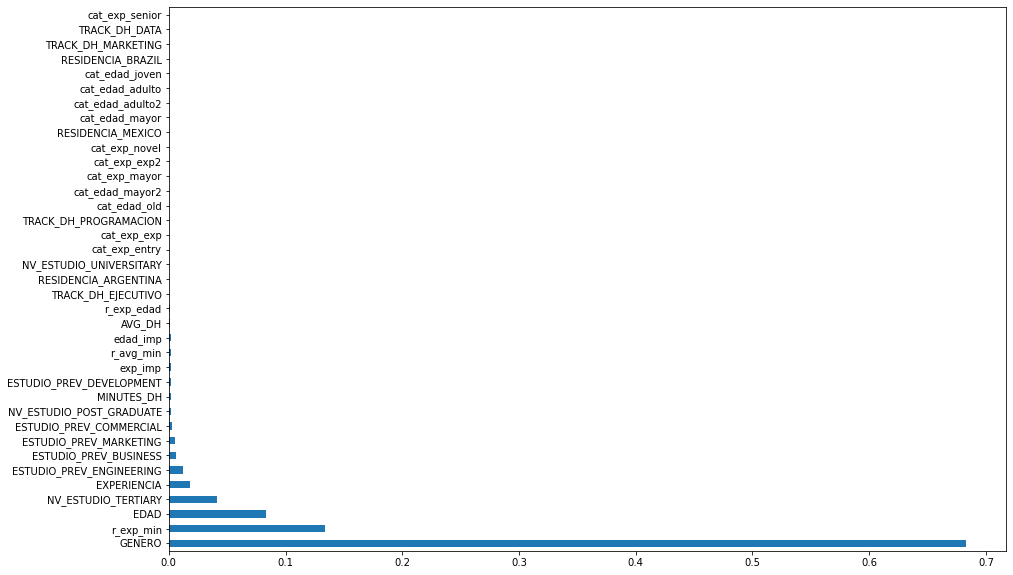

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
feature_importance = pd.Series(regressor['gbr'].best_estimator_.feature_importances_, index=X_train.columns.tolist())
feature_importance.nlargest(40).plot(kind='barh',ax=ax)

In [62]:
best_parameters

defaultdict(list,
            {'abr': {'base_estimator': DecisionTreeRegressor(max_depth=16, random_state=15),
              'base_estimator__criterion': 'mse',
              'base_estimator__max_depth': 16,
              'learning_rate': 2.0,
              'loss': 'linear',
              'n_estimators': 120,
              'random_state': 15},
             'etr': {'criterion': 'mse',
              'max_depth': 8,
              'max_features': 'auto',
              'min_samples_split': 5,
              'n_estimators': 140,
              'n_jobs': -1,
              'random_state': 15},
             'rfr': {'criterion': 'mae',
              'max_depth': 20,
              'max_features': 'auto',
              'min_samples_split': 4,
              'n_estimators': 140,
              'n_jobs': -1,
              'random_state': 15},
             'hgbr': {'learning_rate': 0.1,
              'loss': 'least_absolute_deviation'},
             'gbr': {'criterion': 'friedman_mse',
              'lea

In [79]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4,shuffle=True )
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=4, random_state=None, shuffle=True)
TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 3] TEST: [2]


## Algunos consejos antes de entrenar a un modelo:

1. Manejar valores perdidos

2. Manejar variables categóricas

<hr>

## A continuación, le brindamos una plantilla simple para que sepa cómo estructurar las entradas y salidas de su modelo

### Removiendo columnas

In [ ]:
df_training_dataset_1 = df_training_dataset.drop(columns=['Unnamed: 0', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'], inplace=False)
df_training_dataset_1.tail()

### Removendo valores NaN

In [ ]:
df_training_dataset_2 = df_training_dataset_1.dropna()
df_training_dataset_2.tail()

### Codificando variables categóricas

In [ ]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies`` (demontración)
df_training_dataset_3 = pd.get_dummies(df_training_dataset_2, columns=['GENERO'])
df_training_dataset_3.tail()

### Seleccionando las columnas "features" y "target"

In [ ]:
df_training_dataset_3.columns

In [ ]:
features = df_training_dataset_3[
    [
        'EDAD', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
        'GENERO_FEMENINO', 'GENERO_MASCULINO'
    ]
]

target = df_training_dataset_3['DIAS_EMP']  ## NO CAMBIE EL NOMBRE DE LA VARIABLE "target".

### Dividiendo el conjunto de datos para una "prueba ciega"

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Entrenando un modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression


regression_model = LinearRegression().fit(X_train, y_train)

### Evaluando el modelo de regresión con el método  "score()" de sklearn

In [ ]:
regression_model.score(X_test, y_test)

<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [8]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

--2020-09-13 03:58:54--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65243 (64K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv’

to_be_scored_digita 100%[===================>]  63.71K  --.-KB/s    in 0.001s  

2020-09-13 03:58:55 (72.6 MB/s) - ‘to_be_scored_digitalhouse.csv’ saved [65243/65243]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA
995,995,28.0,NaN,BRAZIL,UNIVERSITARY,DEVELOPMENT,DATA,4.0,4730.5,NaN
996,996,30.0,MASCULINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,NaN,4698.4,10.0
997,997,33.0,NaN,BRAZIL,POST_GRADUATE,DEVELOPMENT,PROGRAMACION,3.9,4644.7,14.4
998,998,26.0,MASCULINO,NaN,UNIVERSITARY,DEVELOPMENT,PROGRAMACION,3.4,4498.1,6.1
999,999,46.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,NaN,3.9,4682.0,NaN


# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

In [ ]:
df_to_be_scored_1 = df_to_be_scored.drop(columns=['Unnamed: 0', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'], inplace=False)

df_to_be_scored_2 = df_to_be_scored_1.dropna()

df_to_be_scored_3 = pd.get_dummies(df_to_be_scored_2, columns=['GENERO'])
df_to_be_scored_3.tail()

In [ ]:
df_to_be_scored_3.columns

<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [ ]:
y_pred = regression_model.predict(df_to_be_scored_3)
df_to_be_scored_3['target'] = y_pred
df_to_be_scored_3.tail()

# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv( index=False))